In [1]:
#Declaring the variables
import pandas as pd
import prophet as prophet
import numpy as numpy
import matplotlib.pyplot as mplot
import seaborn as sb
import random
import ipywidgets as widget
from prophet import Prophet

In [2]:
#Print the dataset as a test
#Insert the location of the dataset below (e.g. location.csv)
#Dataset is available to download from the Google Drive linked in the Report
df = pd.read_csv('F:\IndividualProject\DATA.csv', error_bad_lines = False, low_memory = False) #, parse_dates=['Date'])
df.head()

C:\Users\ATuck\AppData\Local\Temp\ipykernel_16492\2385033548.py:4: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('F:\IndividualProject\DATA.csv', error_bad_lines = False, low_memory = False) #, parse_dates=['Date'])
Skipping line 1513591: expected 23 fields, saw 24
Skipping line 2457236: expected 23 fields, saw 24
Skipping line 4944955: expected 23 fields, saw 41



,ID1,ID2,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,"(41.691784636, -87.635115968)"


In [10]:
#Converting the Date to the Datetime format for ease of use
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')
df.Date

Date
2004-01-01 00:01:00   2004-01-01 00:01:00
2003-03-01 00:00:00   2003-03-01 00:00:00
2004-06-20 11:00:00   2004-06-20 11:00:00
2004-12-30 20:00:00   2004-12-30 20:00:00
2003-05-01 01:00:00   2003-05-01 01:00:00
                              ...        
2016-05-03 23:33:00   2016-05-03 23:33:00
2016-05-03 23:30:00   2016-05-03 23:30:00
2016-05-03 00:15:00   2016-05-03 00:15:00
2016-05-03 21:07:00   2016-05-03 21:07:00
2016-05-03 23:38:00   2016-05-03 23:38:00
Name: Date, Length: 7941282, dtype: datetime64[ns]

In [11]:
#Index the datetimes
df.index = pd.DatetimeIndex(df.Date)

In [107]:
#counts all the primary types and displays no of each
df['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [13]:
#indexes said primary types
order_data = df['Primary Type'].value_counts().index

<Axes: xlabel='count', ylabel='Primary Type'>

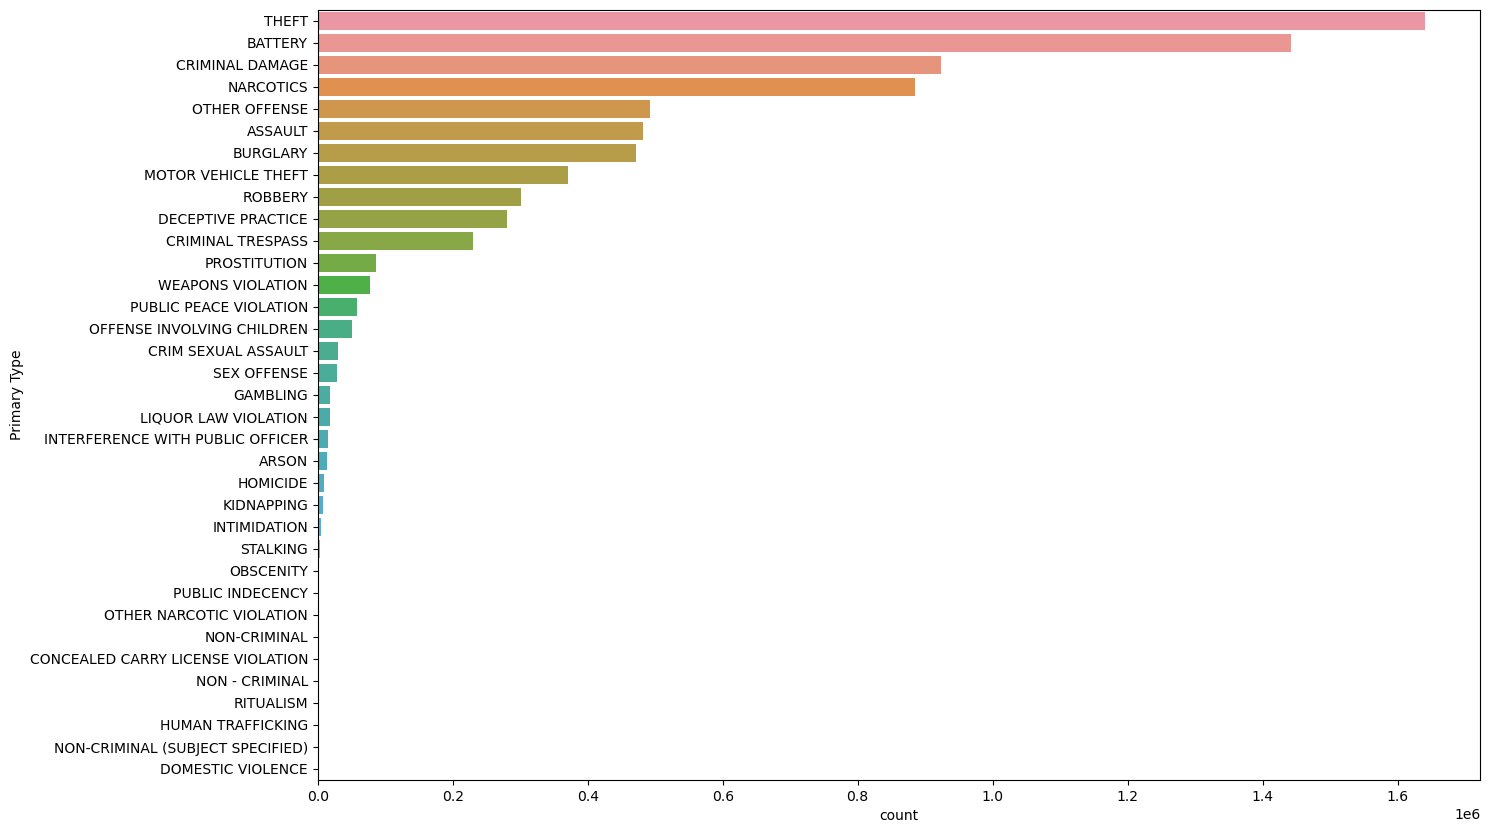

In [14]:
#plots all the previously said primary types to display it visually
mplot.figure(figsize=(15,10))
sb.countplot(y='Primary Type', data=df, order = order_data)

In [15]:
#counts all the crime that occurs within a specific year
df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'No of Crimes')

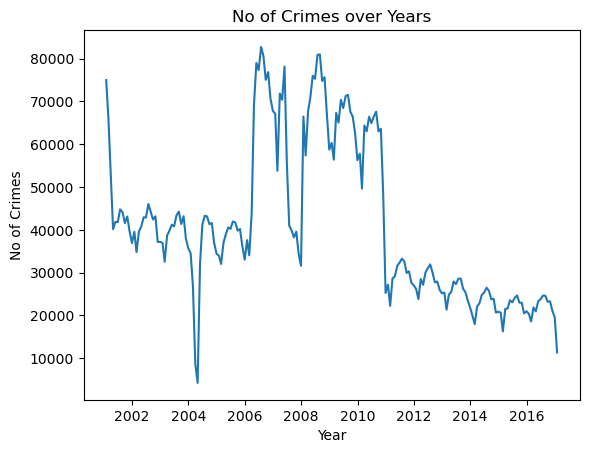

In [53]:
#plots the dataset based on crime that occured within the months of each year
mplot.plot(df.resample('M').size())
mplot.title('No of Crimes over Years')
mplot.xlabel('Year')
mplot.ylabel('No of Crimes')

In [17]:
#creating an index to be used with prophet
cprophetmonth = df.resample('M').size().reset_index()
cprophetmonth.columns = ['Date', 'No of Crimes']
cprophetmonth

,Date,No of Crimes
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [19]:
#creating a dataframe for use in prophet
dfcprophetmonth = pd.DataFrame(cprophetmonth)
dfcprophetmonth

,Date,No of Crimes
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [20]:
#renames the columns for ease of use in prophet
dfcprophetmonthpredict = dfcprophetmonth.rename(columns={'Date':'ds', 'No of Crimes':'y'})
dfcprophetmonthpredict

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [31]:
#starts the prophet algorithms
model = Prophet()
model.fit(dfcprophetmonthpredict)
#uses future and forecast to create the future datasets along with the forecast
#predicting it
future = model.make_future_dataframe(periods = 1000)
forecast = model.predict(future)
forecast

17:43:34 - cmdstanpy - INFO - Chain [1] start processing
17:43:34 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40562.477750,22612.616068,54588.306285,40562.477750,40562.477750,-1572.493808,-1572.493808,-1572.493808,-1572.493808,-1572.493808,-1572.493808,0.0,0.0,0.0,38989.983942
1,2001-02-28,40709.742844,19631.425620,50140.866882,40709.742844,40709.742844,-6456.383827,-6456.383827,-6456.383827,-6456.383827,-6456.383827,-6456.383827,0.0,0.0,0.0,34253.359017
2,2001-03-31,40872.786342,22696.889185,53977.939350,40872.786342,40872.786342,-2068.340495,-2068.340495,-2068.340495,-2068.340495,-2068.340495,-2068.340495,0.0,0.0,0.0,38804.445847
3,2001-04-30,41030.570372,23654.101590,54479.329074,41030.570372,41030.570372,-1473.548459,-1473.548459,-1473.548459,-1473.548459,-1473.548459,-1473.548459,0.0,0.0,0.0,39557.021913
4,2001-05-31,41193.613869,29306.308540,60272.393168,41193.613869,41193.613869,3883.947272,3883.947272,3883.947272,3883.947272,3883.947272,3883.947272,0.0,0.0,0.0,45077.561141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,2019-10-24,234.493394,-5444.568775,27252.619832,-1225.956672,1818.901930,10408.957500,10408.957500,10408.957500,10408.957500,10408.957500,10408.957500,0.0,0.0,0.0,10643.450894
1189,2019-10-25,220.504267,-5440.916016,26494.474333,-1242.815421,1807.888769,9773.747450,9773.747450,9773.747450,9773.747450,9773.747450,9773.747450,0.0,0.0,0.0,9994.251717
1190,2019-10-26,206.515141,-4894.388949,25381.251513,-1259.674171,1795.300450,8940.844190,8940.844190,8940.844190,8940.844190,8940.844190,8940.844190,0.0,0.0,0.0,9147.359331
1191,2019-10-27,192.526015,-6683.107315,26037.189908,-1276.532920,1782.712132,7927.583744,7927.583744,7927.583744,7927.583744,7927.583744,7927.583744,0.0,0.0,0.0,8120.109759


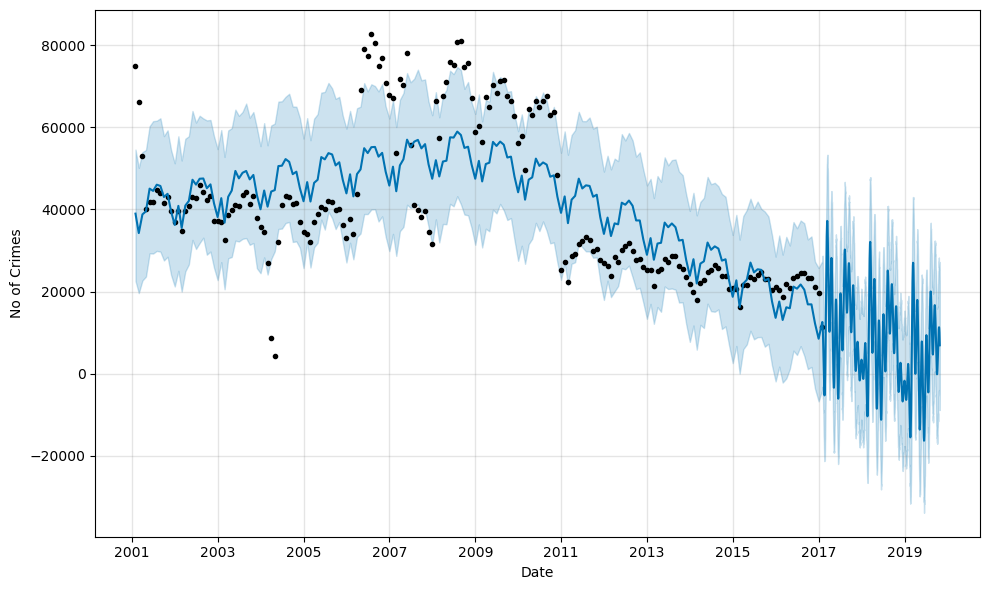

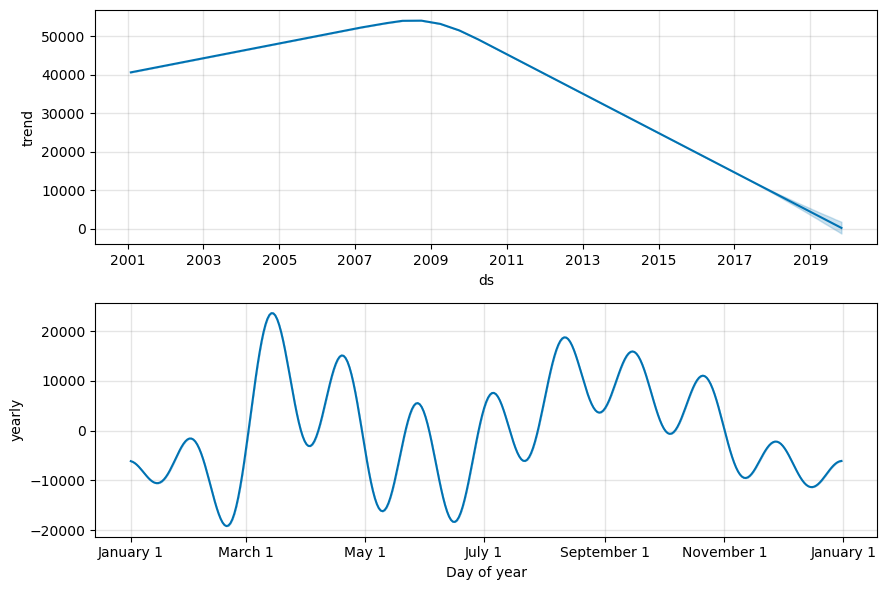

In [32]:
#plots said forecast prediction
fig1 = model.plot(forecast, xlabel='Date', ylabel='No of Crimes')
#similar to above, plots specific aspects
fig2 = model.plot_components(forecast)

In [33]:
#creating an index to be used with prophet
cprophetyear = df.resample('Y').size().reset_index()
cprophetyear.columns = ['Date', 'No of Crimes']
cprophetyear

,Date,No of Crimes
0,2001-12-31,568518
1,2002-12-31,490879
2,2003-12-31,475913
3,2004-12-31,388205
4,2005-12-31,455811
5,2006-12-31,794684
6,2007-12-31,621848
7,2008-12-31,852053
8,2009-12-31,783900
9,2010-12-31,700691


In [34]:
#creating a dataframe for use in prophet
dfcprophetyear = pd.DataFrame(cprophetyear)
dfcprophetyear

,Date,No of Crimes
0,2001-12-31,568518
1,2002-12-31,490879
2,2003-12-31,475913
3,2004-12-31,388205
4,2005-12-31,455811
5,2006-12-31,794684
6,2007-12-31,621848
7,2008-12-31,852053
8,2009-12-31,783900
9,2010-12-31,700691


In [35]:
#renames the columns for ease of use in prophet
dfcprophetyearpredict = dfcprophetyear.rename(columns={'Date':'ds', 'No of Crimes':'y'})
dfcprophetyearpredict

,ds,y
0,2001-12-31,568518
1,2002-12-31,490879
2,2003-12-31,475913
3,2004-12-31,388205
4,2005-12-31,455811
5,2006-12-31,794684
6,2007-12-31,621848
7,2008-12-31,852053
8,2009-12-31,783900
9,2010-12-31,700691


In [36]:
#starts the prophet algorithms
model2 = Prophet()
model2.fit(dfcprophetyearpredict)
#uses future and forecast to create the future datasets along with the forecast
#predicting it
future2 = model2.make_future_dataframe(periods = 1000)
forecast2 = model2.predict(future2)
forecast2

17:43:45 - cmdstanpy - INFO - Chain [1] start processing
17:43:45 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-12-31,-11895.682344,448854.862624,907501.215873,-11895.682344,-11895.682344,689247.886868,689247.886868,689247.886868,689247.886868,689247.886868,689247.886868,0.0,0.0,0.0,677352.204525
1,2002-12-31,-37803.673295,402884.099264,887280.722676,-37803.673295,-37803.673295,684363.502357,684363.502357,684363.502357,684363.502357,684363.502357,684363.502357,0.0,0.0,0.0,646559.829062
2,2003-12-31,-63711.664218,373694.086637,857019.917420,-63711.664218,-63711.664218,678406.438658,678406.438658,678406.438658,678406.438658,678406.438658,678406.438658,0.0,0.0,0.0,614694.774439
3,2004-12-31,-89690.635871,380782.228064,835990.778421,-89690.635871,-89690.635871,693054.028402,693054.028402,693054.028402,693054.028402,693054.028402,693054.028402,0.0,0.0,0.0,603363.392531
4,2005-12-31,-115598.626693,346118.460960,794998.759133,-115598.626693,-115598.626693,689247.886868,689247.886868,689247.886868,689247.886868,689247.886868,689247.886868,0.0,0.0,0.0,573649.260175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,2020-09-22,-497404.336508,-825198.331302,-365506.710042,-497404.338311,-497404.334358,-95478.518807,-95478.518807,-95478.518807,-95478.518807,-95478.518807,-95478.518807,0.0,0.0,0.0,-592882.855315
1013,2020-09-23,-497475.317306,-845721.986842,-398076.009181,-497475.319112,-497475.315152,-121201.795593,-121201.795593,-121201.795593,-121201.795593,-121201.795593,-121201.795593,0.0,0.0,0.0,-618677.112899
1014,2020-09-24,-497546.298103,-870491.418853,-393994.955289,-497546.299913,-497546.295946,-142670.907419,-142670.907419,-142670.907419,-142670.907419,-142670.907419,-142670.907419,0.0,0.0,0.0,-640217.205523
1015,2020-09-25,-497617.278901,-887560.993674,-415833.775528,-497617.280713,-497617.276739,-159137.209566,-159137.209566,-159137.209566,-159137.209566,-159137.209566,-159137.209566,0.0,0.0,0.0,-656754.488467


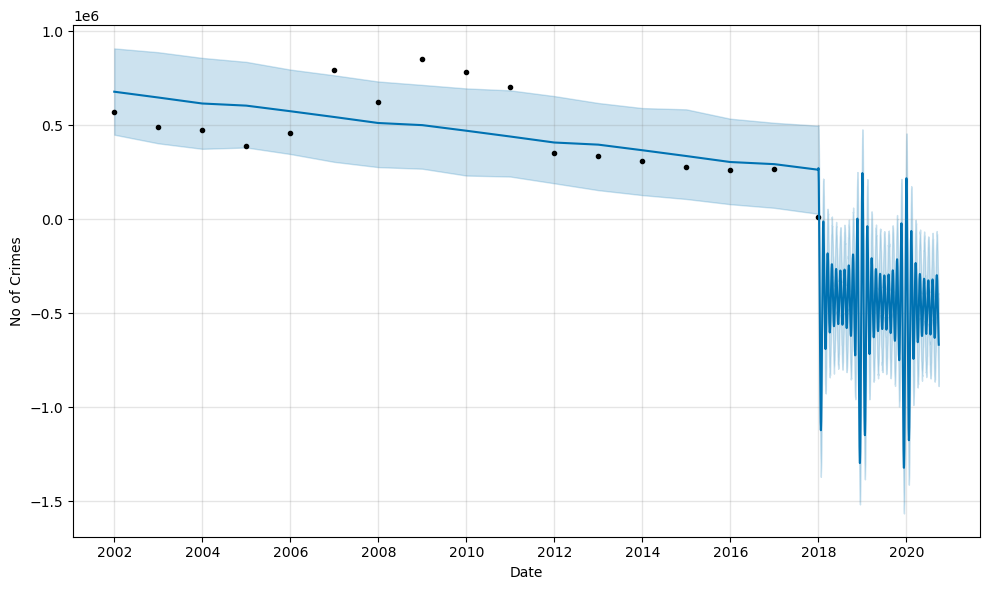

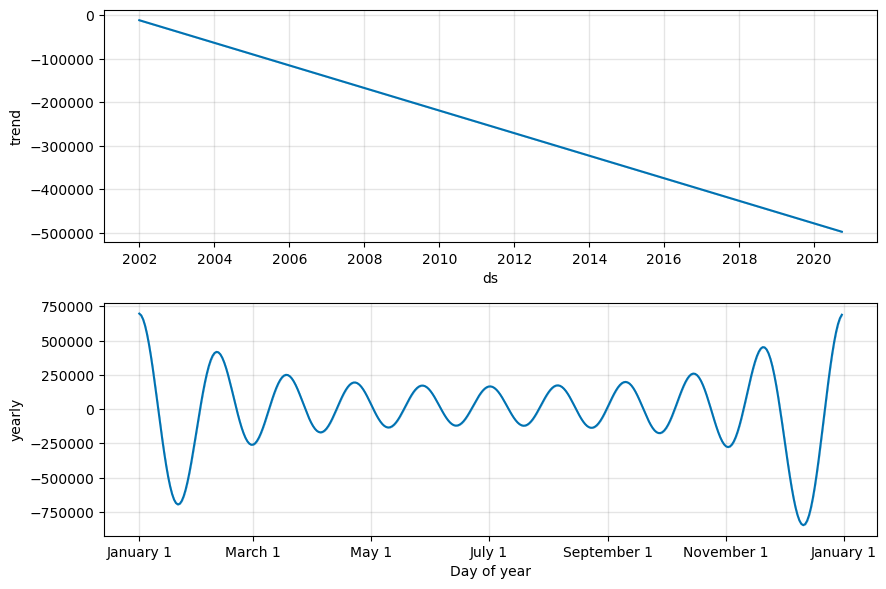

In [37]:
#plots said forecast prediction
fig3 = model2.plot(forecast2, xlabel='Date', ylabel='No of Crimes')
#similar to above, plots 
fig4 = model2.plot_components(forecast2)

<Axes: xlabel='count', ylabel='Primary Type'>

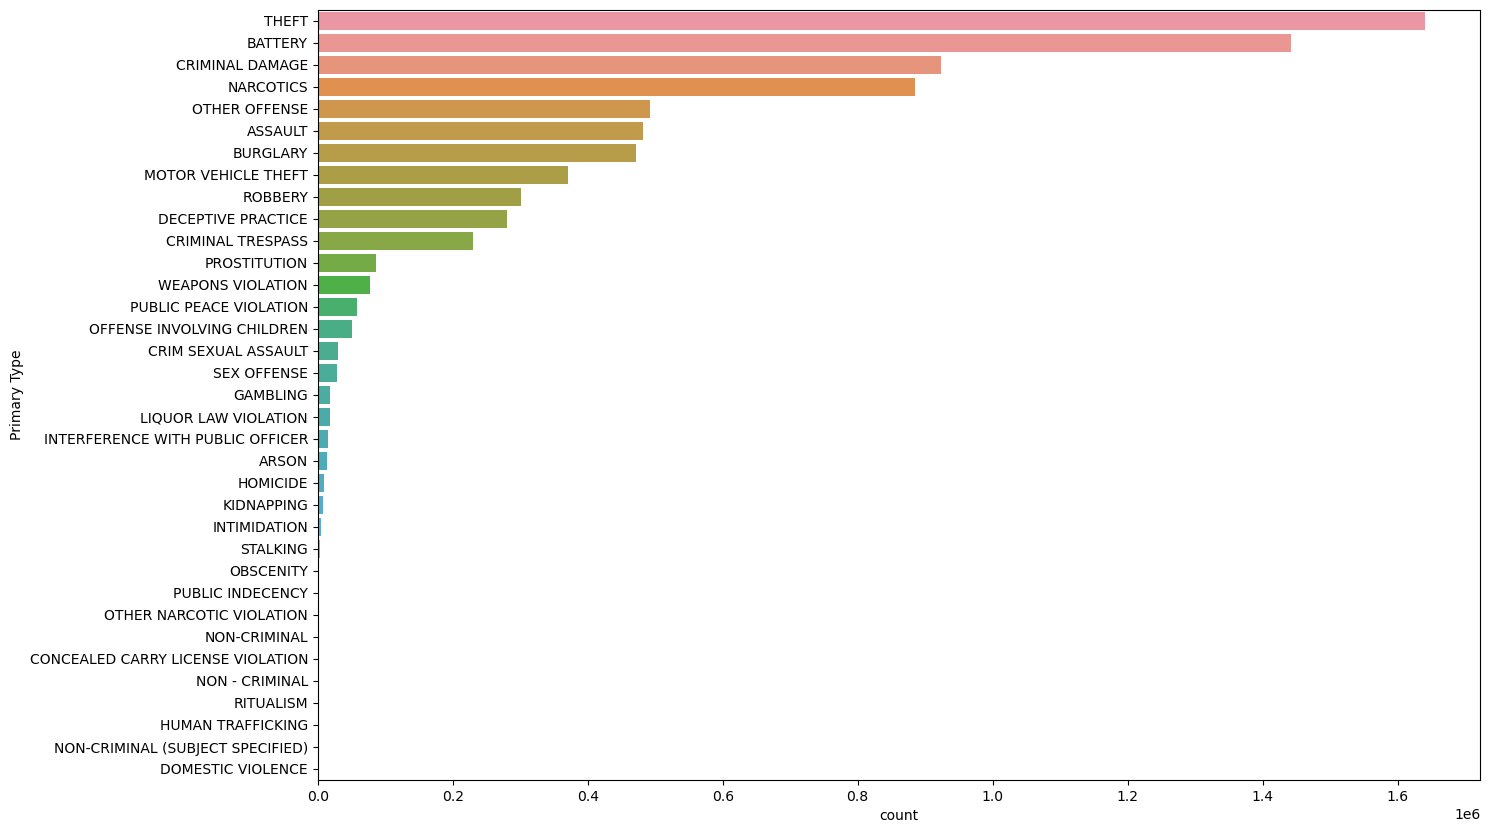

In [38]:
#plots all the previously said primary types to display it visually
mplot.figure(figsize=(15,10))
sb.countplot(y='Primary Type', data=df, order = order_data)

In [46]:
#Declares buttons for use of displaying graphs
buttonpredictmonth = widget.Button(description = 'Display Prediction Monthly')
buttonforecastmonth = widget.Button(description = 'Display Forecast Monthly')
buttonpredictyear = widget.Button(description = 'Display Prediction Yearly')
buttonforecastyear = widget.Button(description = 'Display Forecast Yearly')
buttondisplaycrime = widget.Button(description = 'Display Crime Statistics')
buttondisplaydata = widget.Button(description = 'Display Original Data')
buttondisplaypredictdata = widget.Button(description = 'Display Predicted Data')

out = widget.Output()

def displaypredictionmonth(a):
    fig1 = model.plot(forecast, xlabel='Date', ylabel='No of Crimes')
def displayforecastmonth(b):
    fig2 = model.plot_components(forecast)
    
def displaypredictionyear(c):
    fig3 = model2.plot(forecast2, xlabel='Date', ylabel='No of Crimes')
def displayforecastyear(d):
    fig4 = model2.plot_components(forecast2)

def displaycrime(e):
    mplot.figure(figsize=(15,10))
    sb.countplot(y='Primary Type', data=df, order = order_data)
def displaydata(f):
    dfdisplay = pd.read_csv('F:\IndividualProject\DATA.csv', error_bad_lines = False, low_memory = False) #, parse_dates=['Date'])
    dfdisplay.head()
def displaypredictdata(g):
    model = Prophet()
    model.fit(dfcprophetmonthpredict)
    future = model.make_future_dataframe(periods = 1000)
    forecast = model.predict(future)
    forecast
    
buttonpredictmonth.on_click(displaypredictionmonth)
buttonforecastmonth.on_click(displayforecastmonth)
buttonpredictyear.on_click(displaypredictionyear)
buttonforecastyear.on_click(displayforecastyear)
buttondisplaycrime.on_click(displaycrime)
buttondisplaydata.on_click(displaydata)
buttondisplaypredictdata.on_click(displaypredictdata)

In [52]:
button1 = widget.HBox([buttonpredictmonth, buttonforecastmonth,
                       buttonpredictyear, buttonforecastyear])
button2 = widget.HBox([buttondisplaycrime, buttondisplaydata,
                      buttondisplaypredictdata])
widget.VBox([button1, button2, out])

In [ ]:
#heatmap = pd.DataFrame(dfcprophetmonth)
#heatmap2 = heatmap[['Date', 'No of Crimes']]
#x = pd.DataFrame(heatmap2['Date'].unique())
#heatmap_pt = pd.pivot_table(heatmap2, values = 'No of Crimes', 
                            #index = ['No of Crimes'], columns = 'Date')
#heatmap_pt

#fig5, ax = mplot.subplots(figsize = (16, 8))
#sb.set()
#sb.heatmap(heatmap_pt, cmap = 'YlGnBu')
#mplot.xticks(rotations = 15)
#mplot.show()